

# Projeto 3 - Ciência dos dados 

###### Nomes: Gustavo, Matheus, Pedro Carani e Thiago David

# Modelo preditivo do indíce Ibovespa baseado no próprio indíce.




### A pergunta que nosso modelo tenta responder é: 


# É possível prever o indíce baseado no passado? 

In [2]:
#Escrever um texto explicando a motivacao do trabalho 

## Referências:

    - Montgomery. Cap 11, pág 333.
    -https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score
    -https://scikit-learn.org/stable/modules/model_evaluation.html

## Regressão Linear


 
A regressão linear é um método de ajuste de reta dos dados que estão sendo considerados, e pode ser calculado de acordo com a seguinte fórmula: $y_i=\beta_0+\beta_1x_i+\epsilon_i$. Também, ajuda na procura por padrões e anomalias desses dados.  Primeiro, para fazer uma regressão linear, é necessário achar os coeficientes $\beta_0$ e $\beta_1$.

Para achar o $\beta_0$ nós usamos a seguinte fórmula:

$$\beta_0=\bar{y}-\beta_1\bar{x}$$

E para achar o $\beta_1$ usamos a seguinte fórmula: $$\beta_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Após achar os coeficientes é necessário achar o vetor de resíduos através da fórmula: $\epsilon_i=y_i-(\beta_0+\beta_1x_i)$. Com os coeficientes e o vetor de resíduo já é possível a reta da regressão linear.
    

## Regressão linear em python

Para podermos usar a regressão linear no nosso projeto usamos as seguintes bibliotecas: sklearn.model_selection, sklearn.linear_model e sklearn.metrics. A primeira foi usada para separar os dados para teste com proporção de 20% dos dados. A segunda biblioteca foi usada para calcular a reta da regressão linear; no comando usado já foi calculado todos os coeficientes e vetor de resíduo. A terceira biblioteca foi usada para se calcular o coeficiente de determinação.  

## Sobre o nosso Modelo:


 ### Os dados foram coletados do site https://finance.yahoo.com/:

     - Ibovespa (2018-2019)
     
     
     
     
   

## Qual variável explicativa vai ser utilizada?

#### A variável explicativa a ser utilzada no modelo será o valor do índice ibovespa anterior.

In [4]:
#explicar melhor 

## Nosso modelo:

## Importando bibliotecas: 

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


## Lendo os arquivos de dados:

In [6]:
ibov=pd.read_csv("bov.csv")

# Análise exploratória dos dados:

## Dados do Ibovespa

In [7]:
ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,87719.0,88570.0,85620.0,85620.0,85620.0,5297700
1,2018-11-09,85620.0,86233.0,84030.0,85641.0,85641.0,4814400
2,2018-11-12,85644.0,86227.0,85009.0,85525.0,85525.0,3534000
3,2018-11-13,85531.0,85941.0,84071.0,84914.0,84914.0,4410700
4,2018-11-14,84898.0,85973.0,84267.0,85973.0,85973.0,5591600


## Vamos analisar apenas os dados de fechamento

In [206]:
ibov["Close"].head()

0    85620.0
1    85641.0
2    85525.0
3    84914.0
4    85973.0
Name: Close, dtype: float64

## Criando um novo Dataset com apenas as informações necessárias (fechamento) para a análise:

In [207]:
ibov=pd.DataFrame(ibov, columns=['Date','Close'])


## Dataset do Ibovespa para o modelo:

In [208]:
ibov.head()

,Date,Close
0,2018-11-08,85620.0
1,2018-11-09,85641.0
2,2018-11-12,85525.0
3,2018-11-13,84914.0
4,2018-11-14,85973.0


## Separando os dados:

In [209]:
date=ibov['Date']
pontos=ibov['Close']


## Boxplot do índice Ibovespa


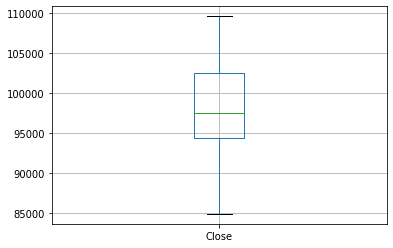

In [210]:
ibov.boxplot();


In [211]:
#texto sobre o boxplot

## Histograma do Ibovespa

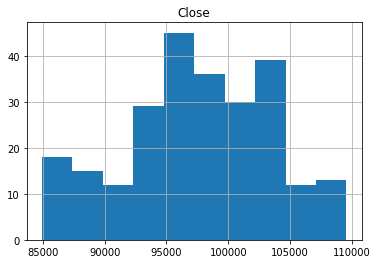

In [212]:
ibov.hist();

Pelo histograma, é possivel analisar que as maiorias dos dados se encontram entre 95.000 pontos a 100.000 pontos.

## Gráfico do Ibovespa durante os anos de 2018 e 2019.

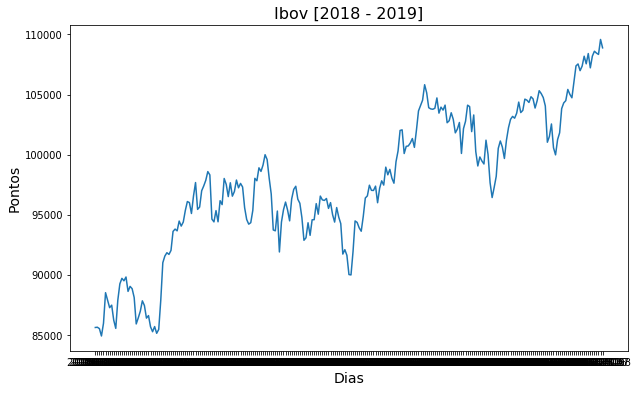

In [213]:
plt.figure(1, figsize=(10,6))
plt.plot(date, pontos)
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();



## Modelo (((EM CONSTRUCAO))): 

## Criando um dataset com o Índice Ibov anterior:

In [214]:
lista = np.array(pontos)
lista=lista[1:]
ibov_anterior=pd.DataFrame(lista)




ibov_novo=ibov.join(ibov_anterior, lsuffix='_caller', rsuffix='_other')
ibovespa=ibov_novo.rename(columns={"Close": "Fechamento anterior", 0: "Fechamento"})
ibovespa=ibovespa.dropna()
ibovespa.head()


,Date,Fechamento anterior,Fechamento
0,2018-11-08,85620.0,85641.0
1,2018-11-09,85641.0,85525.0
2,2018-11-12,85525.0,84914.0
3,2018-11-13,84914.0,85973.0
4,2018-11-14,85973.0,88515.0


In [215]:
anterior=ibovespa["Fechamento anterior"]
fechamento=ibovespa["Fechamento"]

ibovespa.corr()

,Fechamento anterior,Fechamento
Fechamento anterior,1.000000,0.981372
Fechamento,0.981372,1.000000


### Separar dados para treinamento e teste

In [219]:
vals=fechamento.values
K = 5
n = len(vals)
x_dias = []
for k in range(K):
    x = vals[k:(n-K+k)]
    x_dias.append(x)

x_dias = np.array(x_dias).transpose()

X = x_dias[:, :-1]
y = x_dias[:, -1:]

Aqui é separado os dados de teste e os dados para treinamento, os dados dados foram separados na seguinte proporção: 20% para teste e 80% para treinamento


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [221]:
train.head()

,Date,Fechamento anterior,Fechamento
16,2018-12-04,88624.0,89040.0
212,2019-09-19,104339.0,104817.0
170,2019-07-23,103704.0,104120.0
19,2018-12-07,88115.0,85915.0
73,2019-02-28,95584.0,94604.0


Aqui é separado a variável explicativa e a preditiva, sendo o x a explicativa e o y a preditiva.


In [222]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

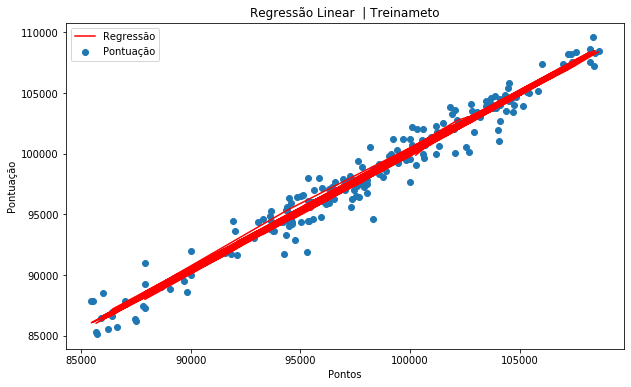

In [224]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train[:,3], y_train, label='Pontuação')
plt.plot(X_train[:,3], y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

In [226]:
y_pred = model.predict(X_test)

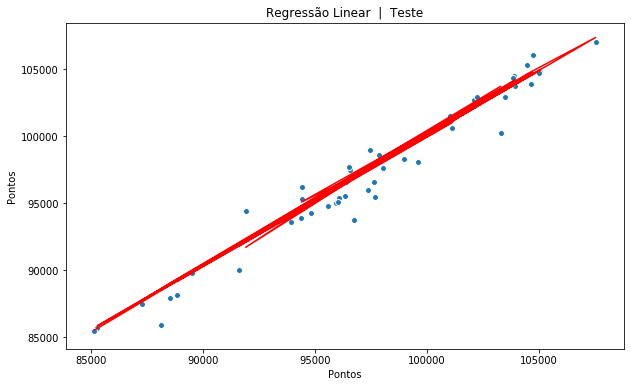

In [227]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  |  Teste')
plt.plot(X_test[:,3],y_pred , color='r', label='Regressão')
plt.scatter(X_test[:,3], y_test, edgecolor='w', label='Pontos')
plt.xlabel('Pontos')
plt.ylabel('Pontos')

plt.show()

In [228]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)


0.9572950475522836

# Análise dos resíduos 

In [229]:
#fazer uma analise melhor!

In [230]:
e=y_test-y_pred

In [231]:
e.hist();

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

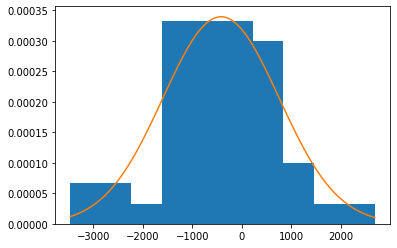

In [232]:
from scipy.stats import norm

mu, std = norm.fit(e)
        
x = np.linspace(min(e), max(e), 100)
p = norm.pdf(x, mu, std)
plt.hist(e, density=True)

plt.plot(x, p)
plt.show()




In [233]:
ibovespa['Predição'] = model.predict(np.array(ibovespa["Fechamento"]).reshape(-1, 1))

ValueError: shapes (248,1) and (4,1) not aligned: 1 (dim 1) != 4 (dim 0)

In [234]:
ibovespa.head()

,Date,Fechamento anterior,Fechamento
0,2018-11-08,85620.0,85641.0
1,2018-11-09,85641.0,85525.0
2,2018-11-12,85525.0,84914.0
3,2018-11-13,84914.0,85973.0
4,2018-11-14,85973.0,88515.0


In [32]:
from sklearn import metrics

In [33]:
ibovespa['Fechamento'].describe()

count       248.000000
mean      97643.797222
std        5878.983045
min       84914.000000
25%       94392.000000
50%       97462.000000
75%      102577.000000
max      109581.000000
Name: Fechamento, dtype: float64

## R²

In [34]:
metrics.r2_score(y_test, y_pred)

0.9569802765059804